In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

# filepath
lab_data = 'C:/Users/User/Desktop/UHACKMED/data/lab_data.csv'

# read data
df_lab_data = pd.read_csv(lab_data)

In [109]:
df_lab_data.shape

(415, 8)

In [110]:
df_lab_data.head()

,HSP_ENC,N TERMINAL PROBNP,TROPONIN I POC ISTAT,TROPONIN POCT (ED),TROPONIN T GEN 5,TROPONIN-T,BNP,Troponin
0,162359002,1142.0,NaN,NaN,NaN,0.01,1.0,0.0
1,162564598,305.0,NaN,NaN,NaN,0.01,0.0,0.0
2,162951004,17473.0,NaN,NaN,NaN,0.04,1.0,1.0
3,162981427,113.0,NaN,NaN,NaN,0.02,0.0,1.0
4,163500445,5685.0,NaN,NaN,NaN,4.27,1.0,1.0


In [111]:
df_lab_data.dtypes

HSP_ENC                   int64
N TERMINAL PROBNP       float64
TROPONIN I POC ISTAT    float64
TROPONIN POCT (ED)      float64
TROPONIN T GEN 5        float64
TROPONIN-T              float64
BNP                     float64
Troponin                float64
dtype: object

In [112]:
df_lab_data.rename(columns = {'BNP':'BNP_STATUS', 'Troponin': 'TROPONIN_STATUS'}, inplace = True)

In [113]:
df_lab_data

,HSP_ENC,N TERMINAL PROBNP,TROPONIN I POC ISTAT,TROPONIN POCT (ED),TROPONIN T GEN 5,TROPONIN-T,BNP_STATUS,TROPONIN_STATUS
0,162359002,1142.0,NaN,NaN,NaN,0.01,1.0,0.0
1,162564598,305.0,NaN,NaN,NaN,0.01,0.0,0.0
2,162951004,17473.0,NaN,NaN,NaN,0.04,1.0,1.0
3,162981427,113.0,NaN,NaN,NaN,0.02,0.0,1.0
4,163500445,5685.0,NaN,NaN,NaN,4.27,1.0,1.0
5,163662934,221.0,NaN,NaN,NaN,0.01,0.0,0.0
6,164166934,NaN,NaN,NaN,NaN,0.04,NaN,1.0
7,164342518,NaN,NaN,NaN,NaN,0.01,NaN,0.0
8,164671684,5661.0,NaN,NaN,NaN,0.04,1.0,1.0
9,164849023,81.0,NaN,NaN,NaN,NaN,0.0,NaN


# Normalize and scale Troponin columns

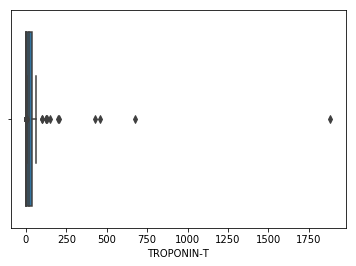

In [114]:
# before normalization
sns.boxplot(df_lab_data['TROPONIN I POC ISTAT'])
sns.boxplot(df_lab_data['TROPONIN POCT (ED)'])
sns.boxplot(df_lab_data['TROPONIN T GEN 5'])
sns.boxplot(df_lab_data['TROPONIN-T'])

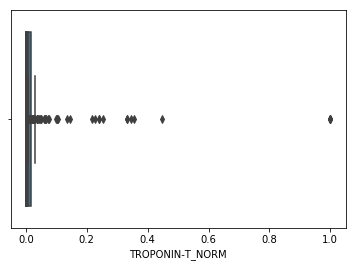

In [115]:
# normalize troponin VALUE columns (in separate df)
# Create x, where x the 'scores' column's values as floats
a = df_lab_data[['TROPONIN I POC ISTAT']].values
b = df_lab_data[['TROPONIN POCT (ED)']].values
c = df_lab_data[['TROPONIN T GEN 5']].values
d = df_lab_data[['TROPONIN-T']].values

min_max_scaler = preprocessing.MinMaxScaler()

a_scaled = min_max_scaler.fit_transform(a)
b_scaled = min_max_scaler.fit_transform(b)
c_scaled = min_max_scaler.fit_transform(c)
d_scaled = min_max_scaler.fit_transform(d)

df_a = pd.DataFrame(a_scaled)
df_b = pd.DataFrame(b_scaled)
df_c = pd.DataFrame(c_scaled)
df_d = pd.DataFrame(d_scaled)

# insert normalized trop VALUE column
df_lab_data['TROPONIN I POC ISTAT_NORM'] = df_a[0].values
df_lab_data['TROPONIN POCT (ED)_NORM'] = df_b[0].values
df_lab_data['TROPONIN T GEN 5_NORM'] = df_c[0].values
df_lab_data['TROPONIN-T_NORM'] = df_d[0].values

# verify normalization
sns.boxplot(df_lab_data['TROPONIN I POC ISTAT_NORM'])
sns.boxplot(df_lab_data['TROPONIN POCT (ED)_NORM'])
sns.boxplot(df_lab_data['TROPONIN T GEN 5_NORM'])
sns.boxplot(df_lab_data['TROPONIN-T_NORM'])

In [116]:
df_lab_data.head()

,HSP_ENC,N TERMINAL PROBNP,TROPONIN I POC ISTAT,TROPONIN POCT (ED),TROPONIN T GEN 5,TROPONIN-T,BNP_STATUS,TROPONIN_STATUS,TROPONIN I POC ISTAT_NORM,TROPONIN POCT (ED)_NORM,TROPONIN T GEN 5_NORM,TROPONIN-T_NORM
0,162359002,1142.0,NaN,NaN,NaN,0.01,1.0,0.0,NaN,NaN,NaN,0.000000
1,162564598,305.0,NaN,NaN,NaN,0.01,0.0,0.0,NaN,NaN,NaN,0.000000
2,162951004,17473.0,NaN,NaN,NaN,0.04,1.0,1.0,NaN,NaN,NaN,0.007042
3,162981427,113.0,NaN,NaN,NaN,0.02,0.0,1.0,NaN,NaN,NaN,0.002347
4,163500445,5685.0,NaN,NaN,NaN,4.27,1.0,1.0,NaN,NaN,NaN,1.000000


# Determine Max Troponin

In [117]:
df_lab_data['TROPONIN_MAX'] = df_lab_data[['TROPONIN I POC ISTAT_NORM', 'TROPONIN POCT (ED)_NORM', 'TROPONIN T GEN 5_NORM', 'TROPONIN-T_NORM' ]].max(axis=1)

In [118]:
df_lab_data.head()

,HSP_ENC,N TERMINAL PROBNP,TROPONIN I POC ISTAT,TROPONIN POCT (ED),TROPONIN T GEN 5,TROPONIN-T,BNP_STATUS,TROPONIN_STATUS,TROPONIN I POC ISTAT_NORM,TROPONIN POCT (ED)_NORM,TROPONIN T GEN 5_NORM,TROPONIN-T_NORM,TROPONIN_MAX
0,162359002,1142.0,NaN,NaN,NaN,0.01,1.0,0.0,NaN,NaN,NaN,0.000000,0.000000
1,162564598,305.0,NaN,NaN,NaN,0.01,0.0,0.0,NaN,NaN,NaN,0.000000,0.000000
2,162951004,17473.0,NaN,NaN,NaN,0.04,1.0,1.0,NaN,NaN,NaN,0.007042,0.007042
3,162981427,113.0,NaN,NaN,NaN,0.02,0.0,1.0,NaN,NaN,NaN,0.002347,0.002347
4,163500445,5685.0,NaN,NaN,NaN,4.27,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000


In [119]:
dict_lab_data_final = {'HSP_ENC': df_lab_data['HSP_ENC'], 'BNP_STATUS': df_lab_data['BNP_STATUS'], 'TROPONIN_MAX': df_lab_data['TROPONIN_MAX'], 'TROPONIN_STATUS': df_lab_data['TROPONIN_STATUS']}
dict_lab_data_final = pd.DataFrame(dict_lab_data_condensed)
dict_lab_data_final.shape

(415, 4)

In [120]:
dict_lab_data_final.head()

,HSP_ENC,BNP_STATUS,TROPONIN_MAX,TROPONIN_STATUS
0,162359002,1.0,0.000000,0.0
1,162564598,0.0,0.000000,0.0
2,162951004,1.0,0.007042,1.0
3,162981427,0.0,0.002347,1.0
4,163500445,1.0,1.000000,1.0


# Save

In [121]:
dict_lab_data_final.to_csv('C:/Users/User/Desktop/UHACKMED/data/cleaned_lab_data.csv', index=0)